# Exploratory Data Analysis on Google Playstore data
### By Ashly Justin

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/enigma/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/enigma/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
gps = pd.read_csv("googleplaystore.csv")

In [3]:
gps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
gps.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Preprocessing Dataset

In [5]:
gps['Rating'] = gps['Rating'].astype(str).astype(float)

In [6]:
gps['Reviews'] = gps['Reviews'].apply(lambda x: x.replace('3.0M', '3000000'))
gps['Reviews'] = gps['Reviews'].apply(lambda x: int(x))

In [7]:
gps = gps[gps['Installs'] != 'Free']
gps = gps[gps['Installs'] != 'Paid']
gps['Installs'] = gps['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
gps['Installs'] = gps['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
gps['Installs'] = gps['Installs'].apply(lambda x: int(x))

In [8]:
gps['Price'] = gps['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
gps['Price'] = gps['Price'].apply(lambda x: float(x))

In [9]:
gps['Size'] = gps['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
gps['Size'] = gps['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
gps['Size'] = gps['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
gps['Size'] = gps['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
gps['Size'] = gps['Size'].apply(lambda x: float(x))

## Category wise analysis

In [10]:
avg_rate = gps.groupby('Category', as_index=False)['Rating'].mean()
print(avg_rate)

               Category    Rating
0        ART_AND_DESIGN  4.358065
1     AUTO_AND_VEHICLES  4.190411
2                BEAUTY  4.278571
3   BOOKS_AND_REFERENCE  4.346067
4              BUSINESS  4.121452
5                COMICS  4.155172
6         COMMUNICATION  4.158537
7                DATING  3.970769
8             EDUCATION  4.389032
9         ENTERTAINMENT  4.126174
10               EVENTS  4.435556
11               FAMILY  4.192272
12              FINANCE  4.131889
13       FOOD_AND_DRINK  4.166972
14                 GAME  4.286326
15   HEALTH_AND_FITNESS  4.277104
16       HOUSE_AND_HOME  4.197368
17   LIBRARIES_AND_DEMO  4.178462
18            LIFESTYLE  4.094904
19  MAPS_AND_NAVIGATION  4.051613
20              MEDICAL  4.189143
21   NEWS_AND_MAGAZINES  4.132189
22            PARENTING  4.300000
23      PERSONALIZATION  4.335987
24          PHOTOGRAPHY  4.192114
25         PRODUCTIVITY  4.211396
26             SHOPPING  4.259664
27               SOCIAL  4.255598
28            

### Average Rating per category

In [11]:
sns.set(rc={'figure.figsize':(15,10)})

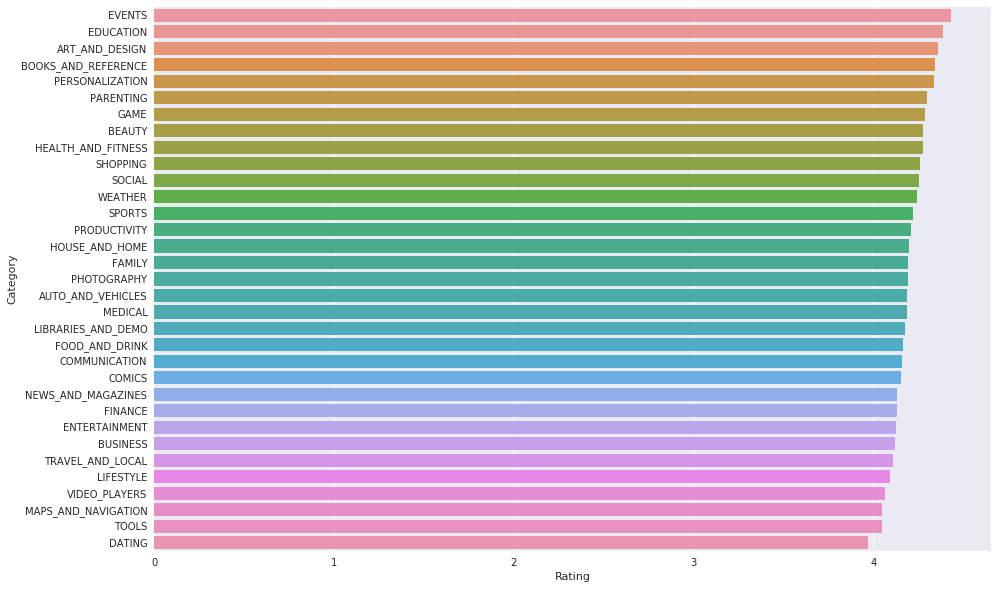

In [12]:
sns.barplot(y='Category',x='Rating',data=avg_rate.sort_values(['Rating'],ascending=False))

### No. of apps per category

In [13]:
total_installs = gps.groupby('Category',as_index=False)['Installs'].sum()
total_installs = total_installs.sort_values(['Installs'],ascending=False).reset_index(drop=True)

[Text(0.5,0,'No. of apps')]

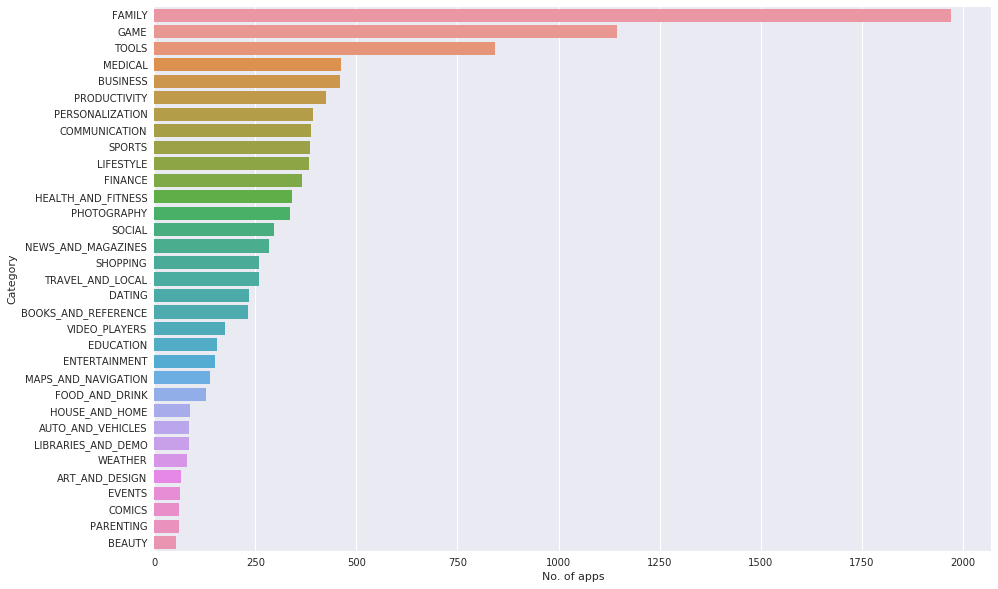

In [14]:
fig=sns.countplot(y='Category',data=gps,order=gps['Category'].value_counts().index)
fig.set(xlabel='No. of apps')

### Total Installs per category

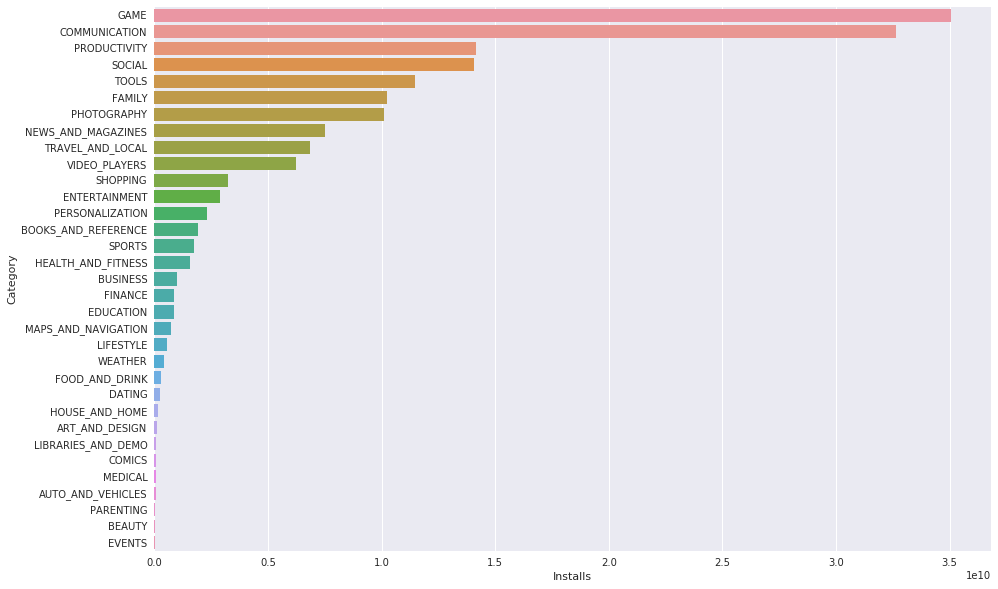

In [15]:
sns.barplot(y='Category',x='Installs',data=total_installs)

### Size vs Category

In [16]:
most_space = gps.groupby('Category', as_index=False)['Size'].sum().sort_values(by='Size', ascending=False)

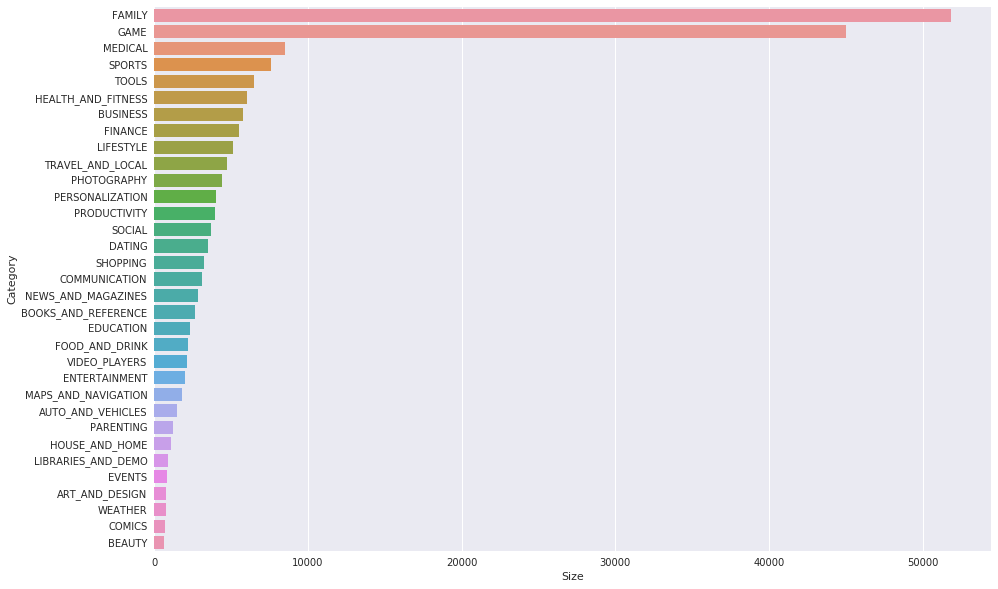

In [17]:
sns.barplot(y='Category',x='Size',data=most_space)


##### While Gaming Apps have the Most reviews & Installations, family apps consume more spaces in Google play.

## Understanding Correlation matrix

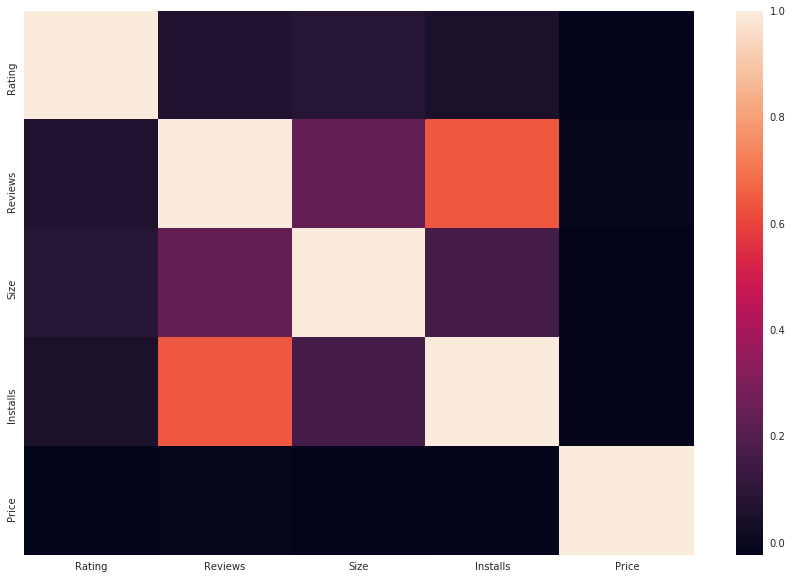

In [18]:
corr= gps.corr()
sns.heatmap(corr)

### It is clear that reviews and no. of installs are positively correlated. More reviews more install. Can't tell about the causal property

/home/enigma/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


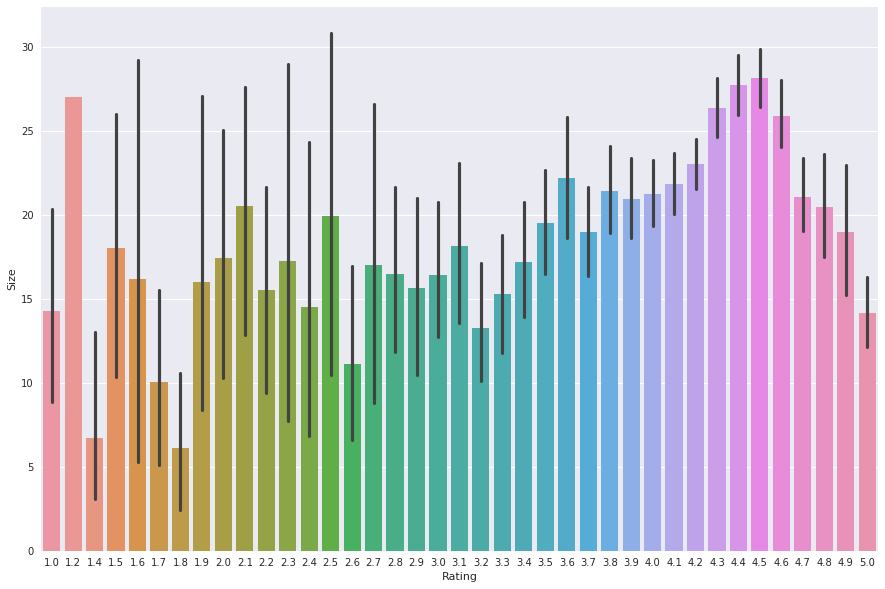

In [19]:
size_rating = sns.barplot(x="Rating", y="Size",data=gps)

### The graph clearly shows apps with more size have generally higher ratings

/home/enigma/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


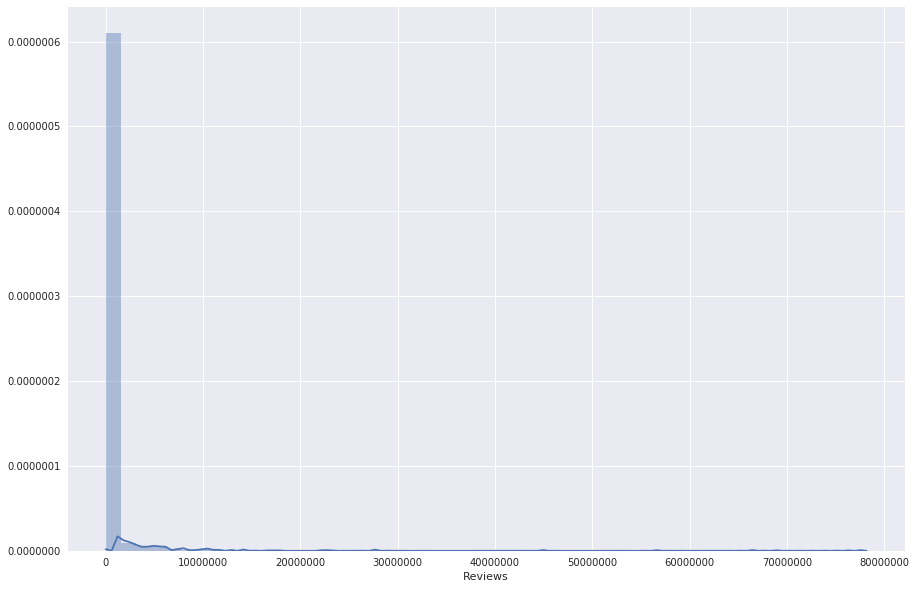

In [21]:

plt.ticklabel_format(style='plain', axis='x',useOffset=False)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

distribution = sns.distplot(gps['Reviews'], kde=True)
distribution

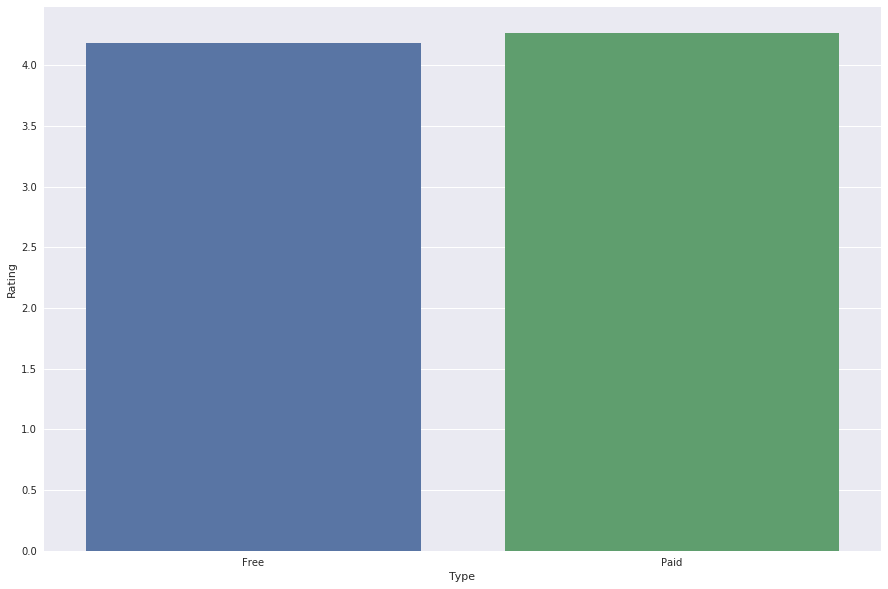

In [22]:
RatingsVsPrice= gps.groupby(['Type'],as_index=False)['Rating'].mean()
sns.barplot(x='Type',y='Rating',data=RatingsVsPrice)

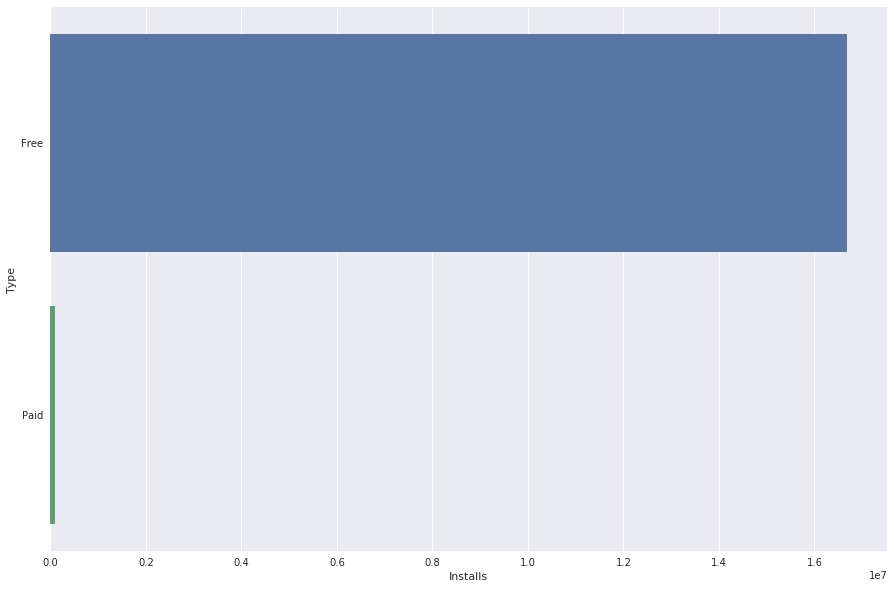

In [23]:
InstallVsPrice= gps.groupby(['Type'],as_index=False)['Installs'].mean()
sns.barplot(x='Installs',y='Type',data=InstallVsPrice)

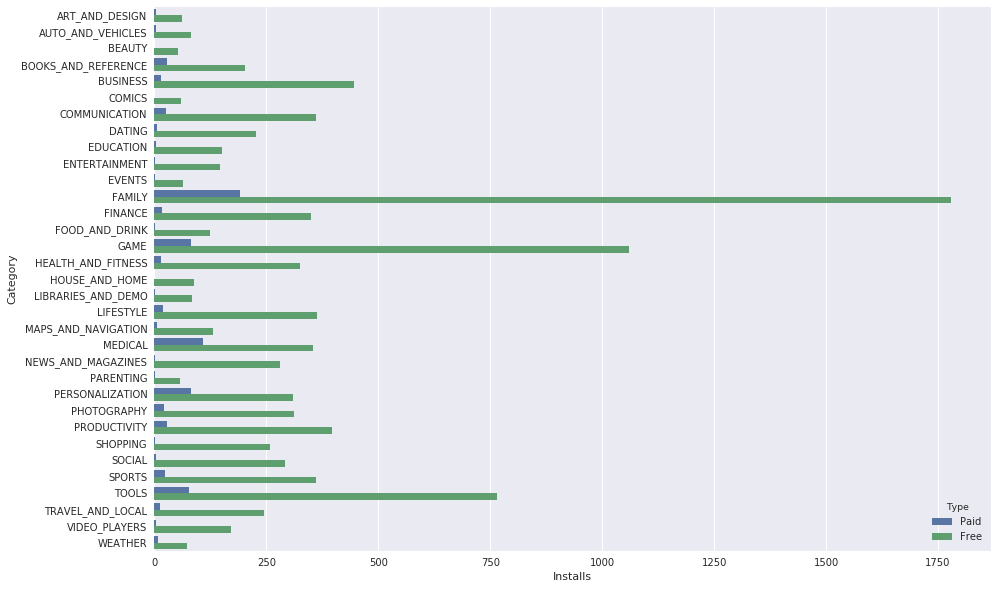

In [24]:
price = gps.groupby(['Category','Type'],as_index=False)['Installs'].count()
price=price.sort_values(['Category','Installs'])
sns.barplot(y="Category",x="Installs",hue="Type",data=price)

### Ratings vs Reviews

/home/enigma/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


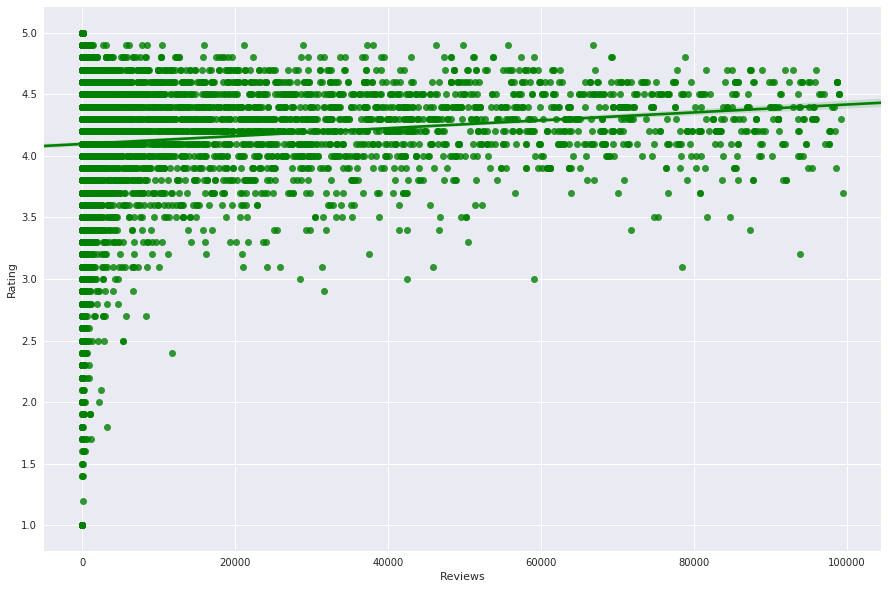

In [25]:
sns.regplot(x="Reviews", y="Rating", color = 'green',data=gps[gps['Reviews']<100000]);

### Most of the apps with higher no. of reviews have better ratings

In [26]:
user_reviews=pd.read_csv('googleplaystore_user_reviews.csv')

In [29]:
user_reviews.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [30]:
user_reviews=user_reviews.dropna()

In [47]:
reviews_count=user_reviews.groupby(['App'],as_index=False)['Translated_Review'].count()
reviews_count=reviews_count.sort_values('Translated_Review',ascending=False)
reviews_count

,App,Translated_Review
256,Bowmasters,312
817,Helix Jump,273
114,Angry Birds Classic,273
328,Calorie Counter - MyFitnessPal,254
510,Duolingo: Learn Languages Free,240
334,Candy Crush Saga,240
718,Garena Free Fire,222
22,8 Ball Pool,219
327,Calorie Counter - Macros,200
0,10 Best Foods for You,194


## Apps with most no. of reviews

In [54]:
reviews_type=user_reviews.groupby(['App'],as_index=False)['Sentiment'].count()
reviews_count=reviews_count.sort_values('Translated_Review',ascending=False)
reviews_count


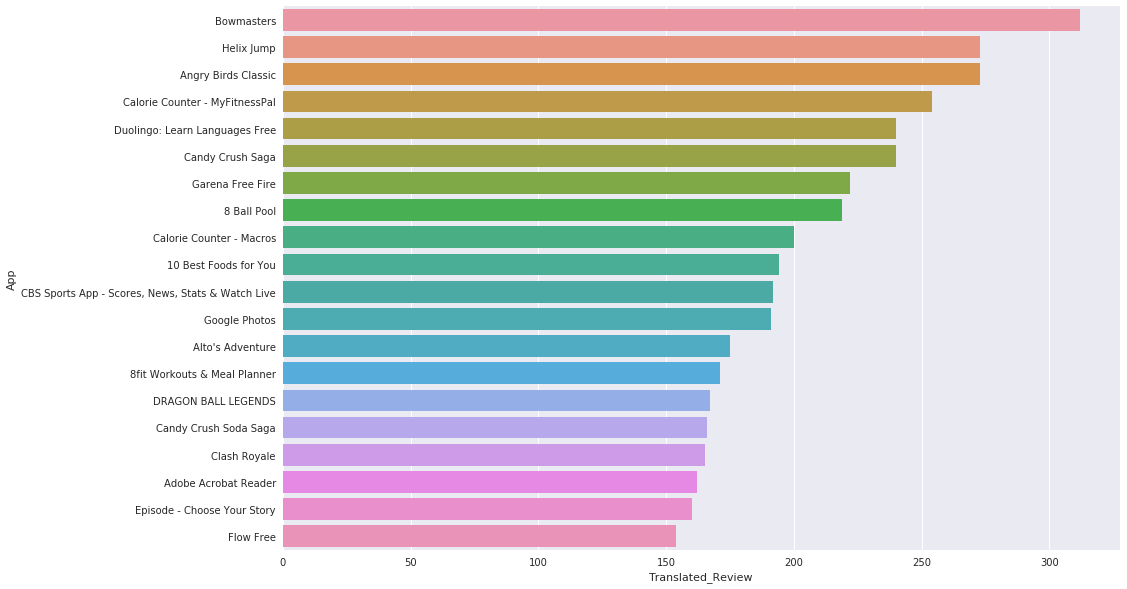

In [50]:
sns.barplot(y='App',x='Translated_Review',data=reviews_count[:20])